<center>
<h1>Algorithme de recherche<br> & <br>marche aléatoire quantique</h1>
</center>

## 1. Motivation

Au cours de l'année 2022-23, notre groupe de PSC (projet scientifique collectif, projet central de la deuxième année du cycle ingénieur polytechnicien de l'École Polytechnique) s'est interessé à la simulation de marches aléatoires quantiques à l'aide de condensats d'atomes froids.

En effet, l'Institut d'Optique a développé un outil de mesure qui permet de connaître les trois composantes de l'impulsion d'une particule, et est à la recherche de potentielles applications afin d'effectuer une demonstration de leur dispositif. La réalisation de marches aléatoires quantiques constitue une piste, et c'est celle que nous avons choisi d'explorer.

La raison pour laquelle on s'intéresse à une marche aléatoire est que le dispositif de l'Institut d'Optique pourrait permettre de réaliser une marche en trois dimensions, grâce à la mesure des trois composantes de la particule, ce qui constituerait une première. En effet, à l'aide de laser, il est possible de modifier aléatoirement l'impulsion de la particule et ainsi réaliser la marche dans l'espace des moments.

Nous vous invintons à consulter le <a href="PDF\Soutenance.pdf">rapport</a> ainsi que les <a href="PDF\Soutenance.pdf">slides de la soutenance</a> pour plus de précisions sur les détails techniques des transitions à deux photons qui permettent d'agir sur les impulsions des particules.

En résumé, notre PSC avait pour but de trouver une application aux marches aléatoires quantiques à 3 dimensions qui tient compte des contraintes imposées par le dispositifs de l'Institut d'Optique. Dans la suite, nous décrivons ce que nous avons proposé.

<center>
<img src="REPORT_IMG\walk3dclassic.png" height="500">
</center>

___

## 2. Notre démarche

Partant de rien, nous avons commencé par étudier la littérature scientifique à la recherche d'informations sur les marches aléatoires quantiques et leurs applications. Nous avons commencé par les résultats les plus connus, mais qui n'étaient généralement pas transposables au dispositif de l'Institut d'Optique, comme par exemple l'algorithme de Grover qui permet de trouver un sommet dans une liste en $O(\sqrt{N})$. Ensuite nous nous sommes interessés à des cas plus proches de ce qu'on pouvait espérer faire avec le dispositif de l'Institut d'Optique. 

### 2.1. Simulations informatiques

Afin de tester les différentes solutions que nous avons rencontrées, nous avons développé des scripts python qui permettent d'effectuer et d'étuider les marches aléatoires, classiques comme quantiques, discrètes comme continues. En effet, les similarités entre les équations qui guident les différentes marches permettent de créer une architecture commune à toutes les marches.

Pour plus de détail sur l'implémentation et l'utilisation du code, voir les fichiers :
- <a href="01_DTRW.py">01_DTRW.py</a> (exemple de réalisation d'une marche aléatoire classique discrète)
- <a href="02_CTRW.py">02_CTRW.py</a> (exemple de réalisation d'une marche aléatoire classique continue)
- <a href="03_DTQW.py">03_DTQW.py</a> (exemple de réalisation d'une marche aléatoire quantique discrète)
- <a href="04_CTRW.py">04_CTRW.py</a> (exemple de réalisation d'une marche aléatoire quantique continue)
- <a href="05_SEARCH_ALGORITHM.py">05_SEARCH_ALGORITHM.py</a> (exemple de réalisation de notre algorithme de recherche)

### 2.2. Les spécificités du dispositif de l'Institut d'Optique

Le dispositif de l'Institut d'Optique permet d'appliquer un hamiltonien aux impulsions d'un ensemble de particules dans un état initial identique avant d'en mesurer les impulsions afin d'en connaître la distribution avec une grande précision, et ce en 3 dimensions. On dispose au départ d'un réseau de positions d'impulsions indexés par $\mathbb{Z}$, $\mathbb{Z}^2$ ou $\mathbb{Z}^3$ selon si la marche se fait à 1, 2 ou 3 dimensions, sur lequel toutes les particules sont positionnée au centre du réseau (toutes sont d'impulsion nulle au départ lorsque l'on utilise un condensat de Bose Einstein). Après l'application de l'hamiltonien pendant un temps $t$, la distribution des particules sur le réseau d'impulsions change, et l'étude de cette distribution peut amener à certaines conclusions quant à la structure de l'hamiltonien appliqué.

L'idée est donc que l'hamiltonien contient par sa structure une information que l'on cherche (comme par exemple un site spécifique du réseau, marqué par des couplages différents avec les sites voisins), et que la marche permet un accès efficace à cette information.

Toutefois, il est important de noter quelques spécificités du dispositif liées au mécanisme du couplage à deux photons:
- les couplages sont uniquement possibles entre deux sites voisins du reseau, $(n,m)$ & $(n,m+1)$ par exemple, mais pas $(n,m)$ & $(n+1,m+1)$
- le contrôle sur chaque couplage entre $(n,m)$ & $(n',m')$ est total (phase et amplitude) et indépendant des autres couplages
- la particule est initialement localisée au centre du réseau (contrainte qu'on choisira d'ignorer dans un premier temps)
- la marche est une marche continue, et peut être réalisée à 1D, 2D et 3D.

### 2.3. Création de notre algorithme

C'est avec ces contraintes et opportunités en têtes que nous sommes partis à la recherche de solutions dans la littérature scientifique. Mais faute d'en trouver qui soient intéressantes et adaptées au dispositif de l'Institut d'Optique, nous avons choisi d'inventer notre propre algorithme en partant d'une idée très simple. Nous avons été assez surpris d'obtenir de bons résultats avec notre algorithme.

#### 2.3.1 Objectif de l'algorithme

Le but de l'algorithme est de trouver un sommet marqué sur un réseau de N sites. Cette opération s'effectue en $O(N)$ à l'aide d'un algorithme classique.

```python
def find_marked_classic(lattice:list):
    # ... performs O(N) operations ... #
    return idx
```

Notre algorithme, lui, permet d'effectuer cette opération en $O(\sqrt{N})$, ce qui présente un considérable gain en complexité, identique à celui fourni par l'algorithme de Grover mentionné plus tôt.

```python
def find_marked_with_qwalk(hamiltonian):
    # ... performs walk for time t=O(sqrt(N)) ... #
    particle = Particle.uniform()
    particle.apply(hamiltonian)
    return particle.mesure_position()
```

Là où la mémoire de l'ordinateur contient le site marqué dans le cas classique, ce sont les coefficients de l'hamiltonien qui contiennent la position du site d'impulsion cible.

#### 2.3.2 Principe de l'algorithme

L'idée est très simple. Pour $\ket{w}$ le site ciblé, on considère l'hamiltonien :
$$
\hat{H}(\gamma) = \hbar \Omega \begin{pmatrix}
            0 & 1 & 0 & 0 & 0 & 0\\
            1 & 0 & 1 & 0 & 0 & 0\\
            0 & 1 & 0 & \gamma & 0 & 0\\
            0 & 0 & \gamma & \textcolor{green}{0} & \gamma & 0\\
            0 & 0 & 0 & \gamma & 0 & 1 \\
            0 & 0 & 0 & 0 & 1 & 0
            \end{pmatrix}
$$

avec en vert le site cible (l'indice de l'hamiltonien qui correspond à $(w,w)$). On espère alors simplement qu'en choisissant bien le facteur $\gamma$ la mesure de la position de la particule (dans l'espace des impulsions) nous renvoie la position du site marqué. Après optimisation, on arrive à obtenir la distribution suivante:
<center>
<img src="REPORT_IMG\p_cible_gamma14_premierpic_particleplot (1).png" height="500">
</center>

Pour voir une animation de la simulation d'une telle marche aléatoire quantique à 2 dimensions, exécuter le script <a href="05_SEARCH_ALGORITHM.py">05_SEARCH_ALGORITHM.py</a>.

#### 2.4 Analyse de l'algorithme

On remarque que l'amplitude au niveau du site cible oscille au cours du temps, on choisit donc de mesurer la position de la particule au moment de son maximum de probabilité. L'étude de ce temps optimal $\tau_{opt}$ est importante car sa dépendance en le nombre de site $N$ du réseau déterminera la complexité de notre algorithme. Par exemple à trois dimension on obtient :
<center>
<img src="REPORT_IMG\RegRac3D (1) (1).png" height="500">
</center>

Les regressions que nous avons effectuées montrent que la dépendance est effectivement en $sqrt(N)$ (et ce à 1, 2 et 3 dimensions), ce qui montre le succès de notre algorithme. Tous ces résultats sont présentés dans le <a href="PDF\Soutenance.pdf">rapport</a> et dans les <a href="PDF\Soutenance.pdf">slides de la soutenance</a> (attention, le rapport contient des erreurs quand à la complexité de notre algorithme, pour avoir les bons résultats, se réferer aux slides de la soutenance).

Toutefois, le but de ce *Notebook* est différent. En effet, il n'est en réalité pas possible d'avoir une répartition uniforme de la particule à l'instant initial, mais il est possible, en utilisant des isolants de Motte, d'obtenir une distribution gaussienne autour du centre du réseau. **Nous cherchons donc à savoir s'il est possible de se contenter d'une distribution gaussienne pour l'initialisation de la particule dans notre algorithme**.

___
## 3. Étude avec une initialisation gaussienne

Commençons par voir avec un exemple à 2 dimensions s'il y a un quelconque espoir que notre algorithme fonctionne toujours.

In [2]:
from QW.qw import *
import numpy as np
from readme import Simulations    

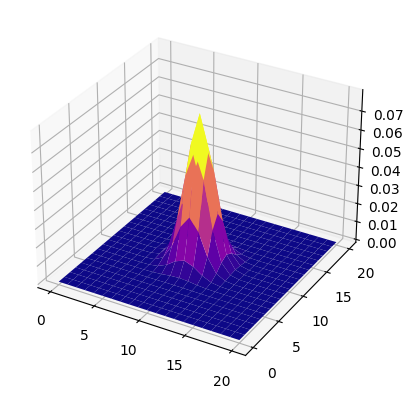

In [4]:
N = 21
d = 2
gamma = 1.4
std = 2
target = (5,3)

particle:QParticle = tensor(QParticle(N,N//2),pow=d)
particle = particle.gaussian(particle.mean(),std)

hamiltonian:Operator = tensor(Operator(N),pow=d)
for pos in hamiltonian.positions():
    for nei in hamiltonian.neighbours(*pos):
        hamiltonian[pos,nei] = 1
        hamiltonian[nei,pos] = 1
for nei in hamiltonian.neighbours(*target):
    hamiltonian[target,nei] = gamma
    hamiltonian[nei,target] = gamma

dt = hamiltonian.timescale()*1j/100
walk = CTW(particle,hamiltonian,dt)

# lets see what it looks like before the walk has started:
walk.plot(0)

La particule possède une distribution gaussienne avec un écart-type petit par rapport à la taille du réseau. La position du site cible est de plus à une distance considérable de l'origine par rapport à l'écart type de la gaussienne. Observons l'état de la particule plus tard dans la marche.

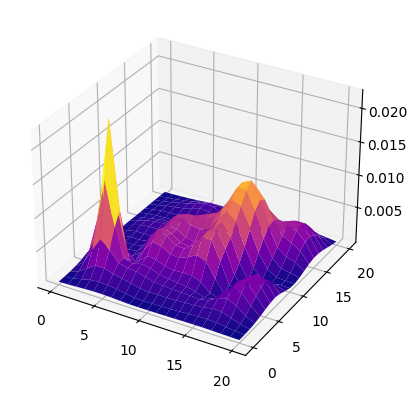

In [5]:
walk.solve(3000)
walk.plot(walk.get_topt(target))

Ainsi tout n'est pas perdu, l'algorithme fonctionne toujours à deux (et trois) dimensions. Il s'agit maintenant d'évaluer à 1, 2 et 3 dimensions la dépendance en $N$ de $\tau_{opt}$. On espère que l'importante instabilité générée par la distribution initiale ne va pas rendre notre algorithme trop instable.

### 3.1. Étude à 1 dimensions

C'est sans doute à 1 dimension que l'algorithme est le plus instable. D'après notre compréhension de notre algorithme, il marche d'autant mieux qu'on donne de l'intertie à notre site cible, pour qu'il *conserve* les particules. Un moyen de réaliser ceci eût été de créer un puits de potentiel au niveau du site cible, ce qui fonctionne aussi. Toutefois, il s'agit d'une opération que ne nous est pas autorisée par les paramètres de l'expérience. La solution que nous avons trouvée a donc été de créer cette inertie en reliant différemment le site cible à ces voisins, ce qui permet à l'algorithme de fonctionner. Sans doute à une dimension un sommet n'a-t-il pas suffisamment de voisins pour garantir que notre algorithme aura de bons résultats. La gaussienne initiale est aussi moins bien étalée à une dimension, puisque pour s'étaler sur 9 sites l'écart type doit être de l'ordre de 4 (4 sites à gauche, 4 site à droite, le site central) alors qu'à 2 dimensions un écart type de 1 suffit (8 site à une distance inférieure à 2, le site central).

Ainsi, il va être difficile d'effectuer une analyse assymptotique sur une marche à une dimension, puisque que l'algorithme ne parvient rapidement plus à renvoyer un bon résultat. Toutefois, pour de petites tailles de réseau, tailles de l'ordre de ce qui est reproductible en laboratoire, l'algorithme est encore valide. Ci dessous sont présentés les évolutions des probabilités respectivement pour un réseau à 10 et 20 sites.

<center>
<img src="REPORT_IMG/gaussian1d_10.png" height="500">
</center>

<center>
<img src="REPORT_IMG/gaussian1d_20.png" height="500">
</center>


Pour $N<=10$, les sites fantômes restent avec une probabilité inférieure au site cible, mais pour $N<20$, il faut faire attention à l'instant de la mesure, car si celui-ci est mal choisi il peut conduire à l'obtention d'un mauvais site (si le bon site n'est pas obtenu, c'est en général son voisin qui est mesuré). Heureusement, on ne retrouve pas ce problème dans les dimensions supérieures, où l'algorithme est plus régulier dans les résultats qu'il renvoie. Ainsi, notre algorithme pourrait tout de même être utilisé pour une démonstration de principe à une dimension, tout en gardant à l'esprit qu'il est plus performant à 2 et 3 dimensions, ce qui finalement souligne l'intérêt du dispositif de l'Institut d'Optique, qui permet justement l'accès à ces dimensions. 

Pour une alternative plus stable à la réalisation de l'algorithme à 1D, se réferrer à la section 3.2.3.

Il reste encore à vérifier à l'aide de nos simulations que le comportement asymptotique de notre algorithme reste en $\sqrt{N}$ avec N le nombre de sites du réseau (N n'est donc pas celui des cellules de code de ce Notebook, mais correspond à $N^d$ avec d la dimension de la marche). Nous allons vérifier ce comportement à 2 et 3 dimensions, où la stabilité de la marche nous le permet.

### 3.2. Étude à 2 et 3 dimensions

#### 3.2.1. Simulations des marches

On simulera nos marches à partir d'un écart type de 2. Pour le cas limite $\sigma \gg N$ (avec N le côté du réseau cette fois), on retrouve l'initialisation uniforme pour notre algorithme, qui a déjà été étudiée et qui fonctionne très bien. Mais pour $\sigma \ll N$ on obtient quelque chose de similaire à l'initialisation de la particule en un point unique, pour lequel l'algorithme ne fonctionne pas. Le cas $\sigma \approx 1$ correspond à un entre-deux, et il est difficle de savoir comment l'algorithme va se comporter. On sait déjà qu'il renvoie toujours le bon résultat, mais la question se pose de connaître le temps d'éxecution nécessaire.

On peut s'attendre à un perte d'efficacité de l'algorithme dû au temps nécessaire à la particule pour se délocaliser (dans l'espace des moments toujours) au début de l'algorithme, afin d'*explorer* le réseau. On commence donc par s'intéresser à l'écart type de la particule au cours du temps, en partant d'une particule initialement entièrement localisée au centre du réseau (ce qui correspondrait au cas limite $N \gg 1$).

<center>
<img src="REPORT_IMG\std_over_time.png" height="500">
</center>

Comme attendu, la particule s'étale de manière linéaire en fonction du temps (jusqu'à ce que les effets de bord se fassent ressentir au niveau de la valeur maximale de l'écart type). On retrouve l'accélération quadratique par rapport au cas classique, mais il faut encore vérifier que cette accéleration se traduit en effet en une accéleration de l'algorithme.

#### 3.2.2. Analyse des résultats

Le graphe suivant montre la dépendance de $\tau_{opt}$ par rapport au nombre $N$ de sommets du réseau. On a espoir de retrouver une complexité en $O(\sqrt N)$. On effectue une regression puissance sur nos simulations et on obtient le graphe suivant :

<center>
<img src="REPORT_IMG\gaussian2d_time.png" height="500">
</center>

On observe que la complexité est furieusement linéaire (on retrouve le même résultat à 3D), et ne présente donc aucun avantage par rappot au cas classique. Il n'est pas évident d'expliquer ce résultat décevant, puisque l'écart type augmente linéairement avec le temps, alors qu'à deux dimensions la distance moyenne des sommets du réseau par rapport au centre du réseau évolue en $\sqrt N$, avec $N$ le nombre de sommets du réseau. On devrait donc atteindre une situation équivalente à une initialisation uniforme en un temps sous-linéaire, ce qui devrait se traduire par une complexité sous-linéaire. Mais ce n'est pas ce qu'il se produit.

C'est donc que le problème vient des effets de bord. En effet, ce sont les effets de bord qui viennent ralentir l'étalement de la particule, par effets d'interférence de la particule qui est renvoyée à elle-même après avoir *rebondi* sur les limites du réseau. Et c'est cela même qui est problématique pour notre algorithme.


#### 3.2.3. Élaboration d'une nouvelle stratégie

On souhaite retrouver l'état intial uniformément distribué afin de pouvoir réaliser notre marche en un temps sous-linéaire. On a donc besoin de se débarrasser des effets de bord. Les trois points suivants vont nous permettre d'y parvenir :
- un état initial uniformément distribué peut être approché par une gaussienne d'écart type grand devant le côté du réseau
- un état initial de distribution gaussienne $\sigma \ge 2$ (pour que l'état initial soit réparti sur plusieurs sites du réseau) auquel on applique un hamiltonien où tous les sites sont couplés de la même manière à leurs voisins s'étale de manière régulière (en restant une gaussienne) et voit son écart type croitre linéairement, et ce jusqu'à ce que les effets de bord entrent en jeu.
- pour deux réseaux de côtés $N_1$ et $N_2$, des distributions gaussiennes d'écart type $N_1$ et $N_2$ correpondront à la même distribution, à un facteur d'échelle près. Auterment dit, la gaussienne d'écart type $N_1$ et aussi bien distribuée sur un réseau de côté $N_1$ qu'une gaussienne d'écart type $N_2$ distribuée sur un réseau de côté $N_2$.

Voici donc la nouvelle stratégie qui permet d'obtenir à nouveau une complexité sous-linéaire sur un réseau à $N$ sites (donc de côté $N^\frac{1}{d}$) :
1. initialisation gaussienne de la particule ($\sigma = 2$)
2. sur un réseau de côté $3N^\frac{1}{d}$ avec des probabilités de transition uniforme entre deux sites voisins, laisser évoluer la particule jusqu'à ce que sa distribution ait un écart type de $N^\frac{1}{d}$. Puisque l'écart type évolue linéairement, cette approche se réalisera en $O(N^\frac{1}{d})$
3. modifier l'hamiltonien en coupant les couplages avec les sites en dehors du réseau de côté $N^\frac{1}{d}$ et en utilisant l'hamiltonien de recherche $H(\gamma)$. Au bout d'un temps en $O(\sqrt{N})$ le site cible sera trouvé

Ainsi, pour $d>1$, on obtient bien un algorithme en $O(\sqrt{N})$, ce qui présente une amélioration par rapport au cas classique. Tout l'intérêt de cette nouvelle apporche est de tenter de retirer l'impact des effets de bord sur la marche afin de retrouver le comportement d'une marche initialisée de manière uniforme.
Notons aussi que l'on obtient pas exactement $O(\sqrt{N})$ puisque ce n'est le cas que pour $\sigma = \infty$, alors que pour $\sigma = 2$ la complexité est linéaire. La complexité réelle de notre algorithme se situe alors quelque part entre ces deux cas limites, mais reste bien sous-linéaire.

Cette approche reste valable à 1D, mais alors l'étape d'augmentation de l'écart type se fait en $O(N)$ seulement, et ne présente pas d'amélioration face au cas classique.

En appiquant cette algorithme on obtient les resultats suivants :

<center>
<img src="REPORT_IMG/new_initialization_gaussian2d.png" height="500">
</center>

#### 3.2.4. Limites

Enfin, il est important de noter que cette technique est incertaine. Tout d'abord, si $\sigma=2$ permet de conserver apporximativement une gaussienne, $\sigma=1$ ne le permet absolument pas. Il est donc légitime de se demander dans quelle mesure $\sigma = 2$ est effectivement suffisant, et surtout jusqu'à quelle taille de réseau.
Ensuite, nos regressions sont difficiles à effectuer, et ce pour deux raisons. La première est dûe à la complexité de la simulation, qui nous empêche de simuler aussi loin que l'on voudrait. La seconde est dûe à la manière dont nous obtenons le temps optimal, qui n'est pas évident à distinguer à l'oeil nu, et que notre algorithme a souvent plus de mal encore à identifier correctement.

### 3.3. Conclusion

L'échec de notre algorithme initial face à une initialisation gaussienne, qui n'est que linéaire, vient des effets de bord qui freinent l'étalement de la distribution sur le réseau. La nouvelle stratégie que nous avons implémentée sépare simplement l'algorithme en deux temps. On commence par étaler la particule sur un réseau élargi pour éviter les effets de bords, ce qu'il est possible de faire en temps sous-linéaire grâce aux propriétés des marches aléatoires quantiques. On applique ensuite notre algorithme initial, qui s'effectue lui aussi en temps sous-linéaire. On obtient ainsi effectivement un algorithme qui trouve un sommet en temps sous-linéaire sur un réseau à 2 ou 3 dimensions.

Quant à l'application expérimentale à 1D, elle est bien possible et renverra le bon résultat (selon nos simulations), que ce soit dans le cadre de notre algorithme initial ou dans le cadre de notre nouvelle implémentation, parce que le nombre de sites du réseau restera très limité.

In [8]:
!jupyter nbconvert --to markdown ./README.ipynb

[NbConvertApp] Converting notebook ./README.ipynb to markdown
[NbConvertApp] Support files will be in README_files\
[NbConvertApp] Making directory .\README_files
[NbConvertApp] Making directory .\README_files
[NbConvertApp] Writing 21139 bytes to README.md
